# Lab 2

*Przygotował:*
**Szymon Budziak**

---

In [1]:
import numpy as np
import pandas as pd

# Drzewa decyzyjne

### Wczytanie danych

In [2]:
train = pd.read_csv('data/ed-titanic-training.csv', index_col=0)
test = pd.read_csv('data/ed-titanic-test.csv', index_col=0)

X_train, y_train = train.drop('Survived', axis=1), train.loc[:, 'Survived']

In [3]:
print(f'X_train shape: {X_train.shape}')
train.head()

X_train shape: (891, 10)


,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,0,3,1,1,0,0,0,0,2,0,1
1,1,1,0,2,0,3,1,1,2,0,3
2,1,3,0,1,0,1,0,0,1,1,4
3,1,1,0,2,0,3,0,1,2,0,3
4,0,3,1,2,0,1,0,0,1,1,1


In [4]:
test.head()

,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,3,1,2,0,0,2,0,1,1,1
1,3,0,2,0,0,0,0,2,0,3
2,2,1,3,0,1,2,0,1,1,1
3,3,1,1,0,1,0,0,1,1,1
4,3,0,1,1,1,0,0,3,0,3


### Wyznaczenie korelacji Pearsona pomiędzy cechami zbioru treningowego i dokonanie wizualizacji macierzy

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: title={'center': 'Pearson Correlation of Features'}>

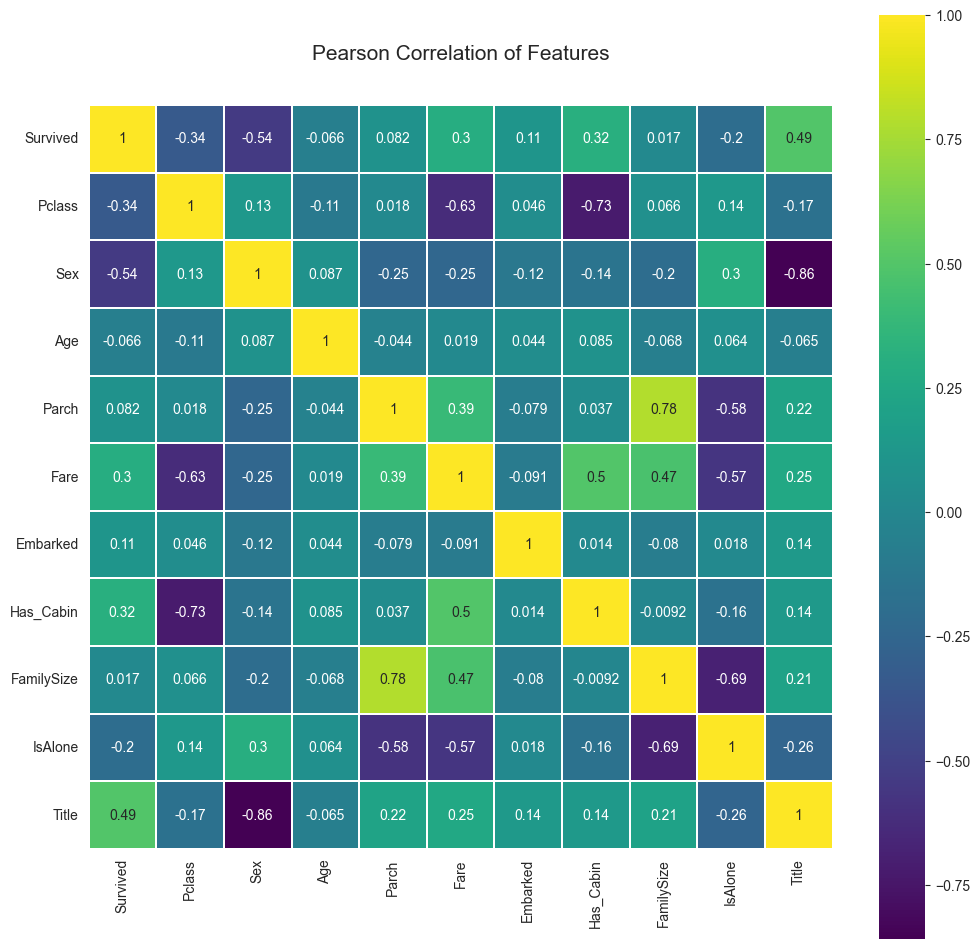

In [6]:
colormap = plt.cm.viridis
plt.figure(figsize=(12, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white',
            annot=True)

**Komenatrz**

Najbardziej skorelowane etykiety, z etykietą przeżycia (**Survived**), to **Sex** i **Title**.

### Współczynnik przeżywalności dla każdego z pięciu różnych tytułów

In [7]:
train.loc[:, ['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,1,0.156673
1,2,0.575000
2,3,0.793651
3,4,0.702703
4,5,0.347826


### Wyznaczenie najlepszej głębokość drzewa decyzyjnego przy użyciu walidacji krzyżowej (10-fold)

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [9]:
n_splits = 10
param_grid = {'max_depth': [i for i in range(2, 2 + n_splits)]}

tree = DecisionTreeClassifier(criterion='gini')
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=n_splits)
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')
print(f'Best estimator: {grid_search.best_estimator_}')

Best parameters: {'max_depth': 3}
Best score: 0.8305243445692885
Best estimator: DecisionTreeClassifier(max_depth=3)


### Drzewo decyzyjne z wyznaczonej wcześniej maksymalnej głębokości

In [10]:
best_params = grid_search.best_params_
best_tree = DecisionTreeClassifier(criterion='gini', max_depth=best_params['max_depth'])
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

### Predykcja możliwości przeżycia dla pasażerów ze zbioru testowego 

In [11]:
predictions = best_tree.predict(test)
output = pd.DataFrame({'Survived': predictions})
output.to_csv('data/ed-titanic-predictions.csv', index=False)
output.head()

,Survived
0,0
1,1
2,0
3,0
4,1


### Wizualizacja drzewa decyzyjnego

[Text(0.5, 0.875, 'x[9] <= 1.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.25, 0.625, 'x[6] <= 0.5\ngini = 0.264\nsamples = 517\nvalue = [436, 81]'),
 Text(0.125, 0.375, 'x[0] <= 1.5\ngini = 0.197\nsamples = 424\nvalue = [377, 47]'),
 Text(0.0625, 0.125, 'gini = 0.351\nsamples = 22\nvalue = [17, 5]'),
 Text(0.1875, 0.125, 'gini = 0.187\nsamples = 402\nvalue = [360, 42]'),
 Text(0.375, 0.375, 'x[4] <= 0.5\ngini = 0.464\nsamples = 93\nvalue = [59, 34]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.4375, 0.125, 'gini = 0.48\nsamples = 85\nvalue = [51, 34]'),
 Text(0.75, 0.625, 'x[7] <= 4.5\ngini = 0.422\nsamples = 374\nvalue = [113, 261]'),
 Text(0.625, 0.375, 'x[0] <= 2.5\ngini = 0.346\nsamples = 323\nvalue = [72, 251]'),
 Text(0.5625, 0.125, 'gini = 0.215\nsamples = 196\nvalue = [24, 172]'),
 Text(0.6875, 0.125, 'gini = 0.47\nsamples = 127\nvalue = [48, 79]'),
 Text(0.875, 0.375, 'x[0] <= 2.5\ngini = 0.315\nsamples = 51\nvalue = [41, 10]'),
 

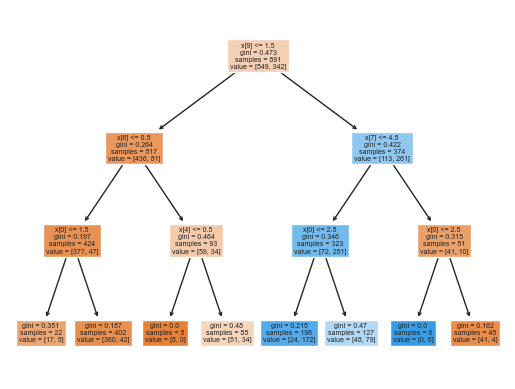

In [12]:
plot_tree(best_tree, filled=True)

### Wpływ różnych parametrów na dokładność klasyfikacji

In [13]:
grid_params = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [i for i in range(1, 11)],
    'max_depth': [i for i in range(2, 11)]
}

tree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=tree, param_grid=grid_params, cv=n_splits)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')
print(f'Best estimator: {grid_search.best_estimator_}')

Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1}
Best score: 0.8316479400749064
Best estimator: DecisionTreeClassifier(criterion='entropy', max_depth=3)


### Podział zbioru treningowego na 75 / 25

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

### Wizualizacja macierzy rozbieżności confusion matrix

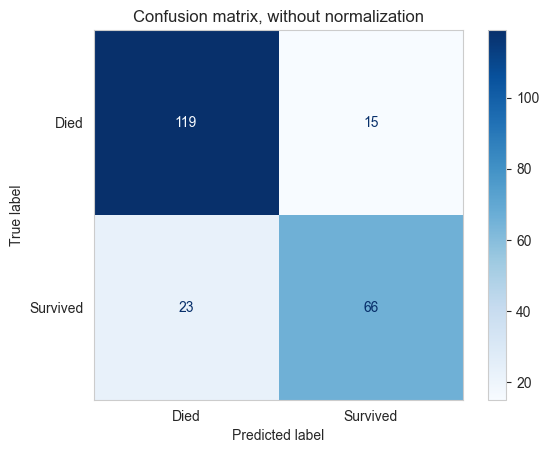

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

best_tree = DecisionTreeClassifier(criterion=best_params['criterion'],
                                   max_depth=best_params['max_depth'],
                                   min_samples_leaf=best_params['min_samples_leaf'])
best_tree.fit(X_train, y_train)
predictions = best_tree.predict(X_test)

disp = ConfusionMatrixDisplay.from_predictions(
    y_true=y_test,
    y_pred=predictions,
    display_labels=['Died', 'Survived'],
    cmap=plt.cm.Blues,
)
disp.ax_.set_title('Confusion matrix, without normalization')
disp.ax_.grid(False)

### Wyznaczenie accuracy, f1-score, average precision-recall

In [16]:
from sklearn.metrics import accuracy_score, f1_score, average_precision_score, recall_score

acc = accuracy_score(y_test, predictions)
f1_sc = f1_score(y_test, predictions)
avg_prec_rec = average_precision_score(y_test, predictions)
rec_score = recall_score(y_test, predictions)

print(f'Accuracy: {acc}')
print(f'F1-score: {f1_sc}')
print(f'Average precision-recall: {avg_prec_rec}')
print(f'Recall score: {rec_score}')

Accuracy: 0.8295964125560538
F1-score: 0.7764705882352941
Average precision-recall: 0.7073837075852494
Recall score: 0.7415730337078652


# Klasyfikator k-NN

In [17]:
from sklearn.datasets import load_breast_cancer

brest_cancer_data = load_breast_cancer()
X_brest_cancer, y_brest_cancer = brest_cancer_data.data, brest_cancer_data.target

nyt_data = pd.read_csv('data/nyt-frame.csv', index_col=0)
X_nyt, y_nyt = nyt_data.drop('class.labels', axis=1), nyt_data.loc[:, 'class.labels']

In [18]:
X_brest_cancer.shape

(569, 30)

In [19]:
nyt_data.shape

(102, 4432)

## Analiza brest cancer

### Reddukcja wymiarowości zbioru danych przy pomocy PCA

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=10)
X_pca_brest = pca.fit_transform(X_brest_cancer)
X_pca_brest.shape

(569, 10)

### Wykorzystanie dziesięciokrotnej walidacji krzyżowej do zmierzenia dokładności klasyfikacji dla k = 1, k = 3, k = 5, k = 7

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_values = [1, 3, 5, 7]
n_splits = 10

best_k_value = -1
best_score = -1

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_pca_brest, y_brest_cancer, cv=n_splits)
    print(f'k = {k}, mean score: {np.mean(scores)}')
    if np.mean(scores) > best_score:
        best_score = np.mean(scores)
        best_k_value = k

print(f'Best k value: {best_k_value} with score: {best_score}')

k = 1, mean score: 0.9156954887218045
k = 3, mean score: 0.9261904761904761
k = 5, mean score: 0.9297619047619046
k = 7, mean score: 0.9279761904761905
Best k value: 5 with score: 0.9297619047619046


### Wpływ wprowadzenia wag odległości oraz innej miary odległości (Euklidesowa vs. Taxi) na rezultaty klasyfikacji

In [23]:
from itertools import product

k_values = [1, 3, 5, 7]
weights = ['uniform', 'distance']
metrics = ['euclidean', 'manhattan']

combinations = list(product(k_values, weights, metrics))

n_splits = 10
best_k_value = best_weight = best_metric = None
best_score = -1

for k, weight, metric in combinations:
    knn = KNeighborsClassifier(n_neighbors=k, weights=weight, metric=metric)
    scores = cross_val_score(knn, X_pca_brest, y_brest_cancer, cv=n_splits)
    print(f'k = {k}, weight = {weight}, metric = {metric}, mean score: {np.mean(scores)}')
    if np.mean(scores) > best_score:
        best_score = np.mean(scores)
        best_k_value = k
        best_weight = weight
        best_metric = metric

print(f'Best k value: {best_k_value}; weight: {best_weight}; metric: {best_metric} with score: {best_score}')

k = 1, weight = uniform, metric = euclidean, mean score: 0.9156954887218045
k = 1, weight = uniform, metric = manhattan, mean score: 0.9191416040100251
k = 1, weight = distance, metric = euclidean, mean score: 0.9156954887218045
k = 1, weight = distance, metric = manhattan, mean score: 0.9191416040100251
k = 3, weight = uniform, metric = euclidean, mean score: 0.9261904761904761
k = 3, weight = uniform, metric = manhattan, mean score: 0.9402568922305763
k = 3, weight = distance, metric = euclidean, mean score: 0.9296992481203008
k = 3, weight = distance, metric = manhattan, mean score: 0.943765664160401
k = 5, weight = uniform, metric = euclidean, mean score: 0.9297619047619046
k = 5, weight = uniform, metric = manhattan, mean score: 0.9384711779448622
k = 5, weight = distance, metric = euclidean, mean score: 0.9297619047619046
k = 5, weight = distance, metric = manhattan, mean score: 0.9349624060150376
k = 7, weight = uniform, metric = euclidean, mean score: 0.9279761904761905
k = 7, 

**Komentarz**

Najlepsze wyniki klasyfikacji uzyskano dla **k = 3**, z **wagami odległości** oraz **metryką taxi**. Można, zaobserwować, że zwiększanie k nie dawało lepszych rezultatów. Warto zauważyć, że dla **k = 1** uzyskano najgorsze wyniki klasyfikacji, natomiast dla k=3, klasyfikacja niezależnie od wybranych innych parametrów zawsze wypadała najlepiej.

## Analiza NYT

### Reddukcja wymiarowości zbioru danych przy pomocy PCA

In [24]:
pca = PCA(n_components=10)
X_pca_nyt = pca.fit_transform(X_nyt)
X_pca_nyt.shape

(102, 10)

### Wykorzystanie dziesięciokrotnej walidacji krzyżowej do zmierzenia dokładności klasyfikacji dla k = 1, k = 3, k = 5, k = 7

In [25]:
k_values = [1, 3, 5, 7]
n_splits = 10

best_k_value = -1
best_score = -1

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_pca_nyt, y_nyt, cv=n_splits)
    print(f'k = {k}, mean score: {np.mean(scores)}')
    if np.mean(scores) > best_score:
        best_score = np.mean(scores)
        best_k_value = k

print(f'Best k value: {best_k_value} with score: {best_score}')

k = 1, mean score: 0.8527272727272728
k = 3, mean score: 0.8818181818181818
k = 5, mean score: 0.8318181818181818
k = 7, mean score: 0.8409090909090908
Best k value: 3 with score: 0.8818181818181818


### Wpływ wprowadzenia wag odległości oraz innej miary odległości (Euklidesowa vs. Taxi) na rezultaty klasyfikacji

In [26]:
from itertools import product

k_values = [1, 3, 5, 7]
weights = ['uniform', 'distance']
metrics = ['euclidean', 'manhattan']

combinations = list(product(k_values, weights, metrics))

n_splits = 10
best_k_value = best_weight = best_metric = None
best_score = -1

for k, weight, metric in combinations:
    knn = KNeighborsClassifier(n_neighbors=k, weights=weight, metric=metric)
    scores = cross_val_score(knn, X_pca_nyt, y_nyt, cv=n_splits)
    print(f'k = {k}, weight = {weight}, metric = {metric}, mean score: {np.mean(scores)}')
    if np.mean(scores) > best_score:
        best_score = np.mean(scores)
        best_k_value = k
        best_weight = weight
        best_metric = metric

print(f'Best k value: {best_k_value}; weight: {best_weight}; metric: {best_metric} with score: {best_score}')

k = 1, weight = uniform, metric = euclidean, mean score: 0.8527272727272728
k = 1, weight = uniform, metric = manhattan, mean score: 0.8627272727272727
k = 1, weight = distance, metric = euclidean, mean score: 0.8527272727272728
k = 1, weight = distance, metric = manhattan, mean score: 0.8627272727272727
k = 3, weight = uniform, metric = euclidean, mean score: 0.8818181818181818
k = 3, weight = uniform, metric = manhattan, mean score: 0.8518181818181818
k = 3, weight = distance, metric = euclidean, mean score: 0.8818181818181818
k = 3, weight = distance, metric = manhattan, mean score: 0.8518181818181818
k = 5, weight = uniform, metric = euclidean, mean score: 0.8318181818181818
k = 5, weight = uniform, metric = manhattan, mean score: 0.8518181818181818
k = 5, weight = distance, metric = euclidean, mean score: 0.8318181818181818
k = 5, weight = distance, metric = manhattan, mean score: 0.8709090909090909
k = 7, weight = uniform, metric = euclidean, mean score: 0.8409090909090908
k = 7,

**Komentarz**

Najlepsze wyniki klasyfikacji uzyskano dla **k = 3**, z **wagami uniform** oraz **metryką euklisedową**. Można, zaobserwować, że zwiększanie k nie koniecznie dawało lepszych rezultatów. Można również zauważyć, że dla **k = 5** został uzyskany najgorszy wynik klasyfikacji.

## Zaimplementuj i przetestuj algorytm KD-tree dla n wymiarów

### Implementacja algorytmu KD-tree

In [27]:
class Node:
    def __init__(self, point, left=None, right=None):
        self.point = point
        self.left = left
        self.right = right


class KDTree:
    def __init__(self, depth=0):
        self.depth = depth

    def build(self, points, depth=0):
        n = len(points)
        if n <= 0:
            return None

        axis = depth % len(points[0])  # Use modulus to ensure depth never exceeds the number of dimensions
        points.sort(key=lambda x: x[axis])
        root = Node(points[n // 2])
        root.left = self.build(points[: n // 2], depth + 1)
        root.right = self.build(points[n // 2 + 1:], depth + 1)

        return root

    def print_tree(self, node, depth=0):
        if node is None:
            return

        # Recursive case: if the node is not None, we need to visit its children
        # First, we visit the left child
        self.print_tree(node.left, depth + 1)

        # Print the current node's point
        # We use ' ' * depth to indent the output according to the node's depth
        # This helps visualize the tree structure in the output
        print(' ' * depth + 'Depth {} -> Node: {}'.format(depth, node.point))

        # Finally, we visit the right child
        self.print_tree(node.right, depth + 1)

### Testowanie algorytmu KD-tree

In [28]:
points = [(2, 3), (5, 4), (9, 6), (4, 7), (8, 1), (7, 2)]

kdtree = KDTree()
root = kdtree.build(points)
kdtree.print_tree(root)

  Depth 2 -> Node: (2, 3)
 Depth 1 -> Node: (5, 4)
  Depth 2 -> Node: (4, 7)
Depth 0 -> Node: (7, 2)
  Depth 2 -> Node: (8, 1)
 Depth 1 -> Node: (9, 6)


In [29]:
points_3d = [(2, 3, 4), (5, 4, 3), (9, 6, 2), (4, 7, 1), (8, 1, 5), (7, 2, 6)]

kdtree_3d = KDTree()
root_3d = kdtree_3d.build(points_3d)
kdtree_3d.print_tree(root_3d)

  Depth 2 -> Node: (2, 3, 4)
 Depth 1 -> Node: (5, 4, 3)
  Depth 2 -> Node: (4, 7, 1)
Depth 0 -> Node: (7, 2, 6)
  Depth 2 -> Node: (8, 1, 5)
 Depth 1 -> Node: (9, 6, 2)


# Lasy losowe

## Czy zastosowanie wielu nieskorelowanych drzew decyzyjnych (las losowy) może poprawić wcześniejsze wyniki klasyfikacji?

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
train = pd.read_csv('data/ed-titanic-training.csv', index_col=0)
test = pd.read_csv('data/ed-titanic-test.csv', index_col=0)

X_train, y_train = train.drop('Survived', axis=1), train.loc[:, 'Survived']

In [32]:
n_splits = 10
param_grid = {
    'n_estimators': [i for i in range(10, 101, 10)],
    'max_depth': [i for i in range(2, 2 + n_splits)],
    'criterion': ['gini', 'entropy']
}

forest = RandomForestClassifier()
grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=n_splits)
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')
print(f'Best estimator: {grid_search.best_estimator_}')

Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 70}
Best score: 0.8350187265917602
Best estimator: RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=70)


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [34]:
best_params = grid_search.best_params_
best_forest = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                     max_depth=best_params['max_depth'],
                                     criterion=best_params['criterion'])
best_forest.fit(X_train, y_train)
predictions = best_forest.predict(X_test)

acc = accuracy_score(y_test, predictions)
f1_sc = f1_score(y_test, predictions)
avg_prec_rec = average_precision_score(y_test, predictions)
rec_score = recall_score(y_test, predictions)

print(f'Accuracy: {acc}')
print(f'F1-score: {f1_sc}')
print(f'Average precision-recall: {avg_prec_rec}')
print(f'Recall score: {rec_score}')

Accuracy: 0.8295964125560538
F1-score: 0.7816091954022989
Average precision-recall: 0.7054063586436238
Recall score: 0.7640449438202247


**Komentarz**

Najlepszy wyniki klasyfikacji dla lasu losowego uzyskano dla **n_estimators = 70**, **max_depth = 5** oraz **criterion = entropy**. Wynik tej klasyfikacji to **0.8350**, co w porównaniu z najlepszym wcześniej wytrenowanym drzewem decyzyjnym (**0.8316**) nie daje znaczącej poprawy. Warto zauważyć, że las losowy jest bardziej skomplikowanym modelem, który może być bardziej skłonny do overfittingu. W przypadku, gdy mamy mały zbiór danych, drzewo decyzyjne może być lepszym wyborem, a w tym przypadku zbiór miał 891 wierszy.

Odpowiadając na zadane pytanie, zastosowanie wielu nieskorelowanych drzew decyzyjnych (las losowy) może poprawić wyniki klasyfikacji, ale nie zawsze musi to być widoczne. W tym przypadku, różnica w wynikach klasyfikacji między lasem losowym a pojedynczym drzewem decyzyjnym nie jest znacząca.

## Dokładność klasyfikacji uzyskiwaną za pomocą klasyfikatora RandomForest na zbiorze Breast Cancer

In [35]:
brest_cancer_data = load_breast_cancer()
X_brest_cancer, y_brest_cancer = brest_cancer_data.data, brest_cancer_data.target

### Analiza Brest Cancer bez PCA

In [36]:
n_splits = 10
param_grid = {
    'n_estimators': [i for i in range(10, 101, 10)],
    'max_depth': [i for i in range(2, 2 + n_splits)],
    'criterion': ['gini', 'entropy']
}

forest = RandomForestClassifier()
grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=n_splits)
grid_search.fit(X_brest_cancer, y_brest_cancer)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')
print(f'Best estimator: {grid_search.best_estimator_}')

Best parameters: {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 40}
Best score: 0.9719298245614034
Best estimator: RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=40)


In [37]:
best_params = grid_search.best_params_
best_forest = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                     max_depth=best_params['max_depth'],
                                     criterion=best_params['criterion'])
best_forest.fit(X_brest_cancer, y_brest_cancer)
predictions = best_forest.predict(X_brest_cancer)

acc = accuracy_score(y_brest_cancer, predictions)
f1_sc = f1_score(y_brest_cancer, predictions)
avg_prec_rec = average_precision_score(y_brest_cancer, predictions)
rec_score = recall_score(y_brest_cancer, predictions)

print(f'Accuracy: {acc}')
print(f'F1-score: {f1_sc}')
print(f'Average precision-recall: {avg_prec_rec}')
print(f'Recall score: {rec_score}')

Accuracy: 0.9982425307557118
F1-score: 0.9986013986013986
Average precision-recall: 0.9972067039106145
Recall score: 1.0


**Komentarz**

Możemy zauważyć, że w przypadku analizy Brest Cancer bez PCA, najlepsze wyniki klasyfikacji uzyskano dla **n_estimators = 40**, **max_depth = 6** oraz **criterion = entropy**. Wynik tej klasyfikacji to **0.9719**, co jest bardzo wysokim wynikiem.

Warto zauważyć, że w przypadku analizy Brest Cancer, las losowy uzyskał duże lepsze wyniki klasyfikacji niż pojedyncze drzewo decyzyjne. Najlepsza wartość accuracy dla pojedynczego drzewa decyzyjnego wynosiła około **0.85**, a dla lasu losowego **0.97**. Widać, że las losowy jest bardziej skutecznym modelem klasyfikacji w przypadku analizy Brest Cancer.

### Analiza Brest Cancer z PCA

In [38]:
pca = PCA(n_components=10)
X_pca_brest = pca.fit_transform(X_brest_cancer)

X_pca_brest_train, X_pca_brest_test, y_pca_brest_train, y_pca_brest_test = train_test_split(X_pca_brest, y_brest_cancer,
                                                                                            test_size=0.25,
                                                                                            random_state=42)

In [39]:
n_splits = 10
param_grid = {
    'n_estimators': [i for i in range(10, 101, 10)],
    'max_depth': [i for i in range(2, 2 + n_splits)],
    'criterion': ['gini', 'entropy']
}

forest = RandomForestClassifier()
grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=n_splits)
grid_search.fit(X_pca_brest_train, y_pca_brest_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')
print(f'Best estimator: {grid_search.best_estimator_}')

Best parameters: {'criterion': 'gini', 'max_depth': 9, 'n_estimators': 40}
Best score: 0.9528792912513844
Best estimator: RandomForestClassifier(max_depth=9, n_estimators=40)


In [40]:
best_params = grid_search.best_params_
best_forest = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                     max_depth=best_params['max_depth'],
                                     criterion=best_params['criterion'])
best_forest.fit(X_pca_brest_train, y_pca_brest_train)
predictions = best_forest.predict(X_pca_brest_test)

acc = accuracy_score(y_pca_brest_test, predictions)
f1_sc = f1_score(y_pca_brest_test, predictions)
avg_prec_rec = average_precision_score(y_pca_brest_test, predictions)
rec_score = recall_score(y_pca_brest_test, predictions)

print(f'Accuracy: {acc}')
print(f'F1-score: {f1_sc}')
print(f'Average precision-recall: {avg_prec_rec}')
print(f'Recall score: {rec_score}')

Accuracy: 0.965034965034965
F1-score: 0.9723756906077348
Average precision-recall: 0.9527673108523133
Recall score: 0.9887640449438202


**Komentarz**

Możemy zauważyć, że w przypadku analizy Brest Cancer z PCA dla 10 komponentów, najlepsze wyniki klasyfikacji uzyskano dla **n_estimators = 40**, **max_depth = 9** oraz **criterion = gini**. Wynik tej klasyfikacji to **0.9528**, co jest nieco niższym wynikiem niż bez PCA. Wyniki te, jednak nadal są znacznie lepsze niż wyniki uzyskane dla pojedynczego drzewa decyzyjnego.